In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-08-31 07:51:41.159545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 07:51:41.159717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 07:51:41.325988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
norm = Normalization()

In [4]:
norm.adapt(x_train)

In [5]:
x_ntrain = norm(x_train)
x_ntest = norm(x_test)

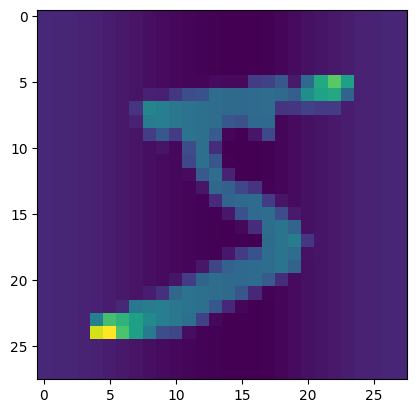

In [6]:
plt.imshow(x_ntrain[0])

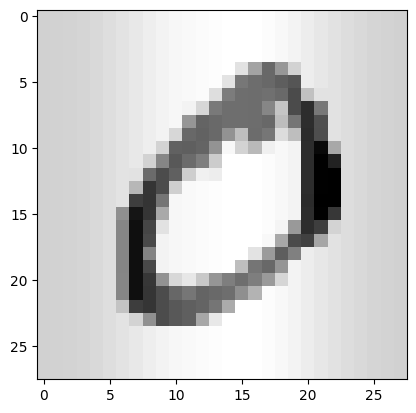

In [7]:
plt.imshow(x_ntrain[1],cmap=plt.cm.binary)

In [8]:
x_ntrain.shape

TensorShape([60000, 28, 28])

In [9]:
IMG_SIZE = 28

In [10]:
x_ntrain = np.array(x_ntrain).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_ntest = np.array(x_ntest).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(64,(3,3),activation='relu', input_shape=x_ntrain.shape[1:]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,442 (556.41 KB)

 Trainable params: 142,442 (556.41 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_ntrain,y_train,epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9021 - loss: 0.3105


In [21]:
y_pred = model.predict([x_ntest])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [22]:
y_pred.shape

(10000, 10)

In [23]:
y_pred

array([[8.5150891e-09, 5.6007485e-07, 4.2101628e-06, ..., 9.9999481e-01,
        8.2318525e-09, 3.1355329e-09],
       [1.0058009e-09, 2.9369209e-08, 9.9999994e-01, ..., 8.8306099e-12,
        2.3610672e-11, 1.5300968e-15],
       [7.6355918e-06, 9.9965370e-01, 1.6006557e-05, ..., 5.7350557e-05,
        3.2458673e-05, 6.6929738e-07],
       ...,
       [9.1776260e-11, 8.8470129e-09, 6.6574713e-13, ..., 2.6476090e-09,
        6.7738144e-09, 1.6441459e-06],
       [3.8582790e-08, 7.0645484e-08, 1.1454795e-07, ..., 2.0135707e-10,
        1.5645245e-06, 2.5560092e-07],
       [9.8817382e-06, 2.9575381e-06, 2.2941420e-05, ..., 7.0474648e-10,
        1.7057984e-05, 5.1240217e-08]], dtype=float32)

In [24]:
y_pred.shape

(10000, 10)

In [25]:
y_pred[0]

array([8.5150891e-09, 5.6007485e-07, 4.2101628e-06, 3.9904813e-07,
       6.7452977e-09, 2.5906022e-10, 2.5857166e-16, 9.9999481e-01,
       8.2318525e-09, 3.1355329e-09], dtype=float32)

In [26]:
y_npred = np.zeros(y_pred.shape[0])

In [27]:
y_npred

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
for y in range(y_pred.shape[0]):
    y_npred[y] = np.argmax(y_pred[y])
y_npred

array([7., 2., 1., ..., 4., 5., 6.])

In [29]:
accuracy_score(y_test,y_npred)

0.9831